In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\asus\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

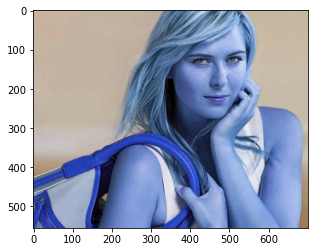

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

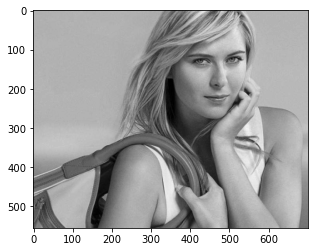

In [6]:
plt.imshow(gray, 'gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
# return [x, y, w, h]

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
x, y, w, h = faces[0]
x, y, w, h

(352, 38, 233, 233)

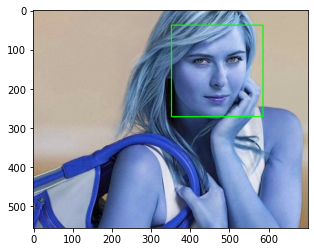

In [9]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (0, 255, 0), 2)
plt.imshow(face_img)

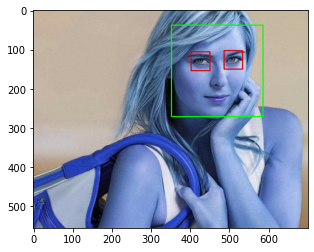

In [10]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (225, 0, 0), 2)
        
plt.figure()
plt.imshow(face_img, 'gray')
plt.show()

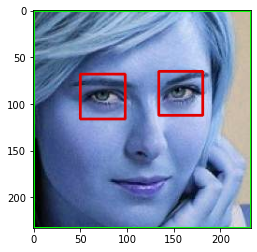

In [11]:
plt.imshow(roi_color, 'gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

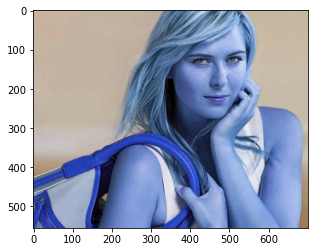

In [13]:
original_img = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_img)

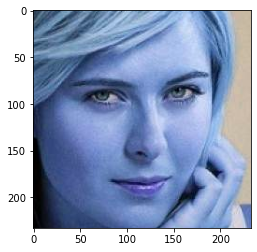

In [14]:
cropped_img = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_img)

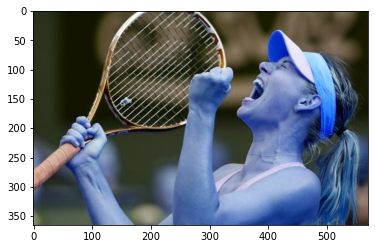

In [15]:
obstructed_original_img = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(obstructed_original_img)

In [16]:
cropped_img2 = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_img2

In [17]:
path_to_data = "./datasets/"
path_to_cropped_data = "./datasets/cropped_datasets/"

In [18]:
# check dataset folders
import os

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./datasets/cropped_datasets',
 './datasets/lionel_messi',
 './datasets/maria_sharapova',
 './datasets/roger_federer',
 './datasets/serena_williams',
 './datasets/virat_kohli']

In [20]:
# if cropped_datasets folder is not found
# it will create it
import shutil

if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data) # if exist, remove
os.mkdir(path_to_cropped_data)

In [21]:
cropped_image_dirs = []
celeb_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celeb_name = img_dir.split('/')[-1]
    print(celeb_name)
    
    celeb_file_names_dict[celeb_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celeb_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celeb_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celeb_file_names_dict[celeb_name].append(cropped_file_path)
            
            count += 1

cropped_datasets
lionel_messi
Generating cropped images in folder:  ./datasets/cropped_datasets/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./datasets/cropped_datasets/maria_sharapova
roger_federer
Generating cropped images in folder:  ./datasets/cropped_datasets/roger_federer
serena_williams
Generating cropped images in folder:  ./datasets/cropped_datasets/serena_williams
virat_kohli
Generating cropped images in folder:  ./datasets/cropped_datasets/virat_kohli


In [37]:
# run after manual cleaning

celeb_file_names_dict = {}

for img_dir in cropped_image_dirs:
    celeb_name = img_dir.split('/')[-1]
    celeb_file_names_dict[celeb_name] = []
    
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
        
    celeb_file_names_dict[celeb_name] = file_list

celeb_file_names_dict

{'lionel_messi': ['./datasets/cropped_datasets/lionel_messi\\lionel_messi1.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi10.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi11.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi13.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi14.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi15.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi16.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi17.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi18.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi19.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi2.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi20.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi22.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi23.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi24.pn

In [38]:
# wavelet transformation
import pywt

def w2d(img, mode='haar', level=1):
    imgArray = img
    imgArray = cv2.cvtColor(imgArray, cv2.COLOR_RGB2GRAY) # cvt to gray
    imgArray = np.float32(imgArray) # cvt to float
    imgArray /= 255;
    
    # compute coefficients
    coeffs = pywt.wavedec2(imgArray, mode, level=level)
    
    # process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    # reconstruction
    imgArray_H = pywt.waverec2(coeffs_H, mode);
    imgArray_H *= 255;
    imgArray_H = np.uint8(imgArray_H)
    
    return imgArray_H

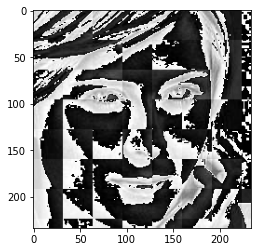

In [39]:
wavelet_img = w2d(cropped_img, 'db1', 5)
plt.imshow(wavelet_img, 'gray')

In [40]:
celeb_file_names_dict

{'lionel_messi': ['./datasets/cropped_datasets/lionel_messi\\lionel_messi1.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi10.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi11.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi13.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi14.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi15.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi16.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi17.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi18.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi19.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi2.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi20.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi22.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi23.png',
  './datasets/cropped_datasets/lionel_messi\\lionel_messi24.pn

In [41]:
celeb_class_dict = {}
count = 0
for celeb_name in celeb_file_names_dict.keys():
    celeb_class_dict[celeb_name] = count
    count += 1

celeb_class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [42]:
X = []
y = []

for celeb_name, training_files in celeb_file_names_dict.items():
    for training_img in training_files:
        img = cv2.imread(training_img)
        if img is None:
            continue
            
        scaled_raw_img = cv2.resize(img, (32, 32))
        
        wavelet_img = w2d(img, 'db1', 5)
        scaled_wavelet_img = cv2.resize(wavelet_img, (32, 32))
        
        # stack vertically
        stacked_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_wavelet_img.reshape(32*32, 1)))
        X.append(stacked_img)
        y.append(celeb_class_dict[celeb_name])

In [43]:
len(X) # total files

160

In [44]:
len(X[0]) # size of each image (32*32*3)+(32*32)

4096

In [45]:
# reshape the X
X = np.array(X).reshape(len(X), len(X[0])).astype(float)
X.shape

(160, 4096)

# Data cleaning process is done.
Proceeding to model training using SVM with rbf kernel tuned with heuristic finetuning.

In [46]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.775

In [49]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.82      0.90      0.86        10
           2       1.00      0.50      0.67         6
           3       0.50      0.67      0.57         6
           4       0.77      0.91      0.83        11

    accuracy                           0.78        40
   macro avg       0.82      0.74      0.75        40
weighted avg       0.82      0.78      0.78        40



# Use GridSearchCV to hypertune our parameter

In [50]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [51]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}

In [52]:
scores = []
best_estimators = {}

import pandas as pd

for model, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[model] = clf.best_estimator_

df = pd.DataFrame(scores)
df

,model,best_score,best_params
0,svm,0.891667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.758333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.883333,{'logisticregression__C': 1}


In [53]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [57]:
best_estimators['svm'].score(X_test, y_test)

0.775

In [58]:
best_clf = best_estimators['svm']

# Using confusion matrix to plot predicted and truth.

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  0,  0,  2,  0],
       [ 0,  8,  1,  1,  0],
       [ 0,  0,  3,  3,  0],
       [ 0,  1,  0,  5,  0],
       [ 0,  1,  0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

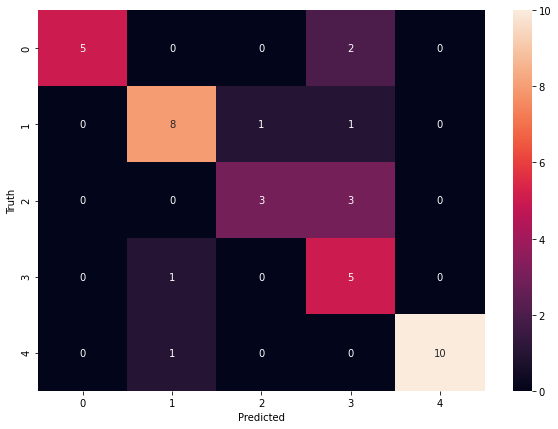

In [60]:
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

celeb_name

In [62]:
celeb_class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

# Saving trained model.

In [64]:
!pip install joblib

import joblib

# save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

You should consider upgrading via the 'c:\users\asus\anaconda3\python.exe -m pip install --upgrade pip' command.


['saved_model.pkl']

# Saving celeb class dictionary.

In [65]:
import json

with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(celeb_class_dict))